In [17]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv(r"D:\Downloads\Customer Churn.csv") 
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [19]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [20]:
df.info 

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

Text(0.5, 1.0, 'Percentage of Churned Customers')

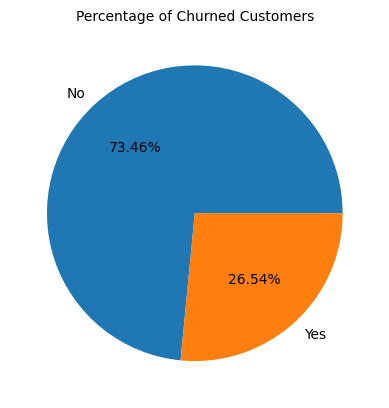

In [18]:

plt.Figure(figsize= (3,4))
gb = df.groupby("Churn").agg({'Churn' : 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct= '%1.2f%%')
plt.title("Percentage of Churned Customers", fontsize= 10)

Converted 0 and 1 values of senior citizen to yes/no to make it easier


In [10]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df["SeniorCitizen"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

Text(0.5, 1.0, 'Count of Churned Customers')

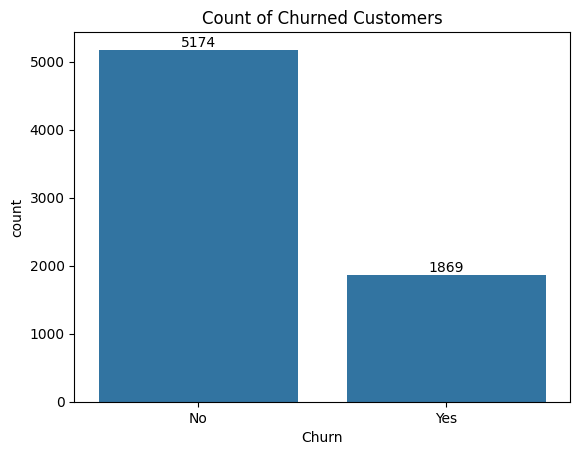

In [11]:
ax = sns.countplot( x='Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Churned Customers")

Text(0.5, 1.0, 'SeniorCitizen Churn Count')

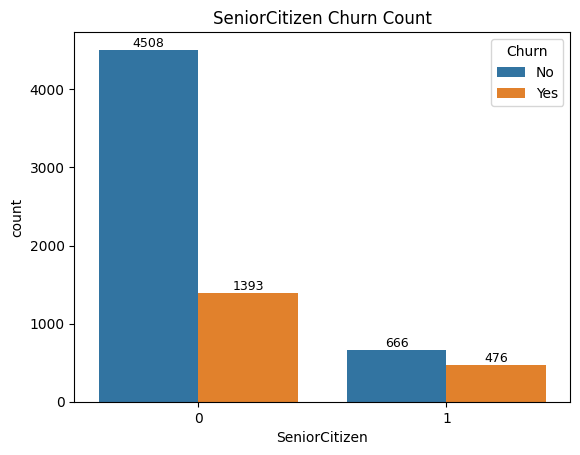

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv(r"D:\Downloads\Customer Churn.csv") 
df.head(3)

# Countplot with hue
bx = sns.countplot(x='SeniorCitizen', data=df, hue='Churn') 

# Add labels to all hue bars
for container in bx.containers:
    bx.bar_label(container, fontsize=9, color='Black')

# Add title and improve style
plt.title("SeniorCitizen Churn Count", fontsize=12) 

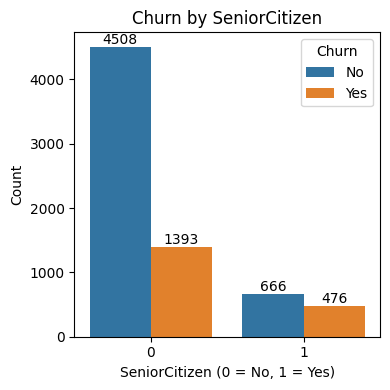

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a full count DataFrame (with missing combos filled)
counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Step 2: Ensure all combinations exist
all_combinations = pd.MultiIndex.from_product(
    [[0, 1], ['No', 'Yes']], names=['SeniorCitizen', 'Churn']
)
counts = counts.set_index(['SeniorCitizen', 'Churn']).reindex(all_combinations, fill_value=0).reset_index()

# Step 3: Plot with seaborn using barplot instead of countplot
plt.figure(figsize=(4, 4))
ax = sns.barplot(data=counts, x="SeniorCitizen", y="Count", hue="Churn")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Final formatting
plt.title("Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


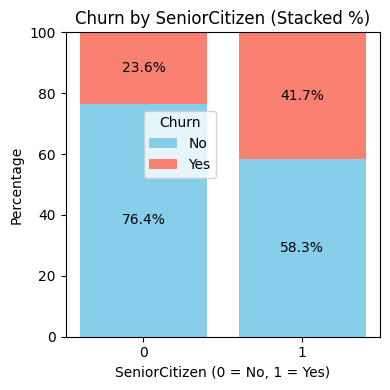

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bars
fig, ax = plt.subplots(figsize=(4, 4))

x = percentages.index
no_vals = percentages.get('No', pd.Series(0, index=x))
yes_vals = percentages.get('Yes', pd.Series(0, index=x))

# Plot 'No'
ax.bar(x, no_vals, label='No', color='skyblue')

# Plot 'Yes' on top of 'No'
ax.bar(x, yes_vals, bottom=no_vals, label='Yes', color='salmon')

# Add % labels
for i in x:
    no = no_vals[i]
    yes = yes_vals[i]

    # Label for 'No'
    if no > 0:
        ax.text(i, no / 2, f"{no:.1f}%", ha='center', va='center', color='black')

    # Label for 'Yes'
    if yes > 0:
        ax.text(i, no + yes / 2, f"{yes:.1f}%", ha='center', va='center', color='black')

# Chart formatting
ax.set_title("Churn by SeniorCitizen (Stacked %)")
ax.set_xlabel("SeniorCitizen (0 = No, 1 = Yes)")
ax.set_ylabel("Percentage")
ax.set_xticks([0, 1])
ax.set_ylim(0, 100)
ax.legend(title="Churn", bbox_to_anchor  =(0.5 , 0.5))
plt.tight_layout()
plt.show()


comparitavly a greater percentage of the senior citizens have churned out 


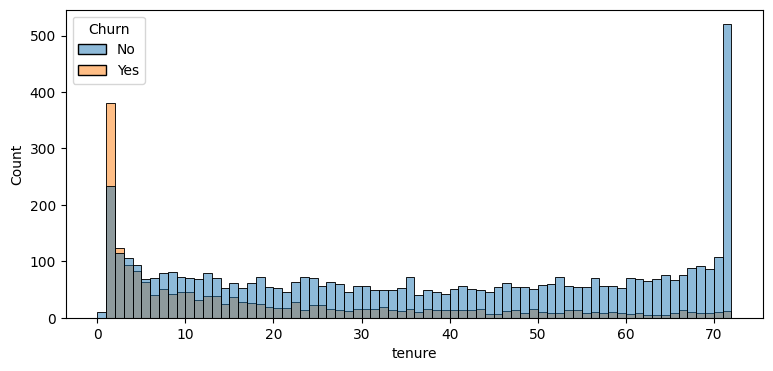

In [13]:
plt.figure(figsize = (9, 4 ))
sns.histplot( x = 'tenure', data = df, bins = 72, hue = "Churn")
plt.show() 

people who have used our services for a longer time have stayed and people who were newer has the high% of churn rate (1 or 2 months)

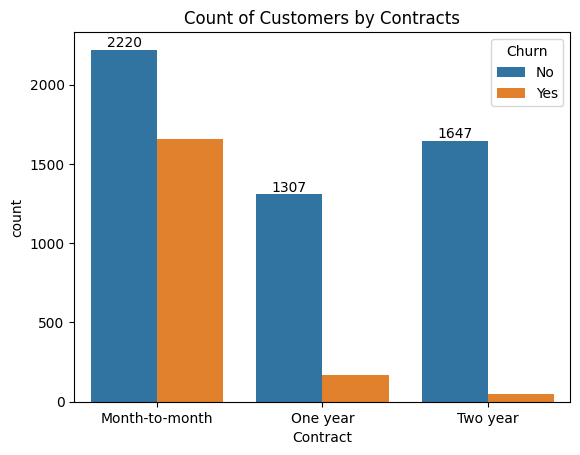

In [ ]:
plt.Figure(figsize=(4,4))
ax = sns.countplot( x = "Contract", data = df,
                    hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contracts")
plt.show() 

people who have month to month contracts have the higher tendency to churn. So th ecompany can go ahead with promoting there long term deals to the customers and provide then additional features to make them connected to the company 

In [16]:
df.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

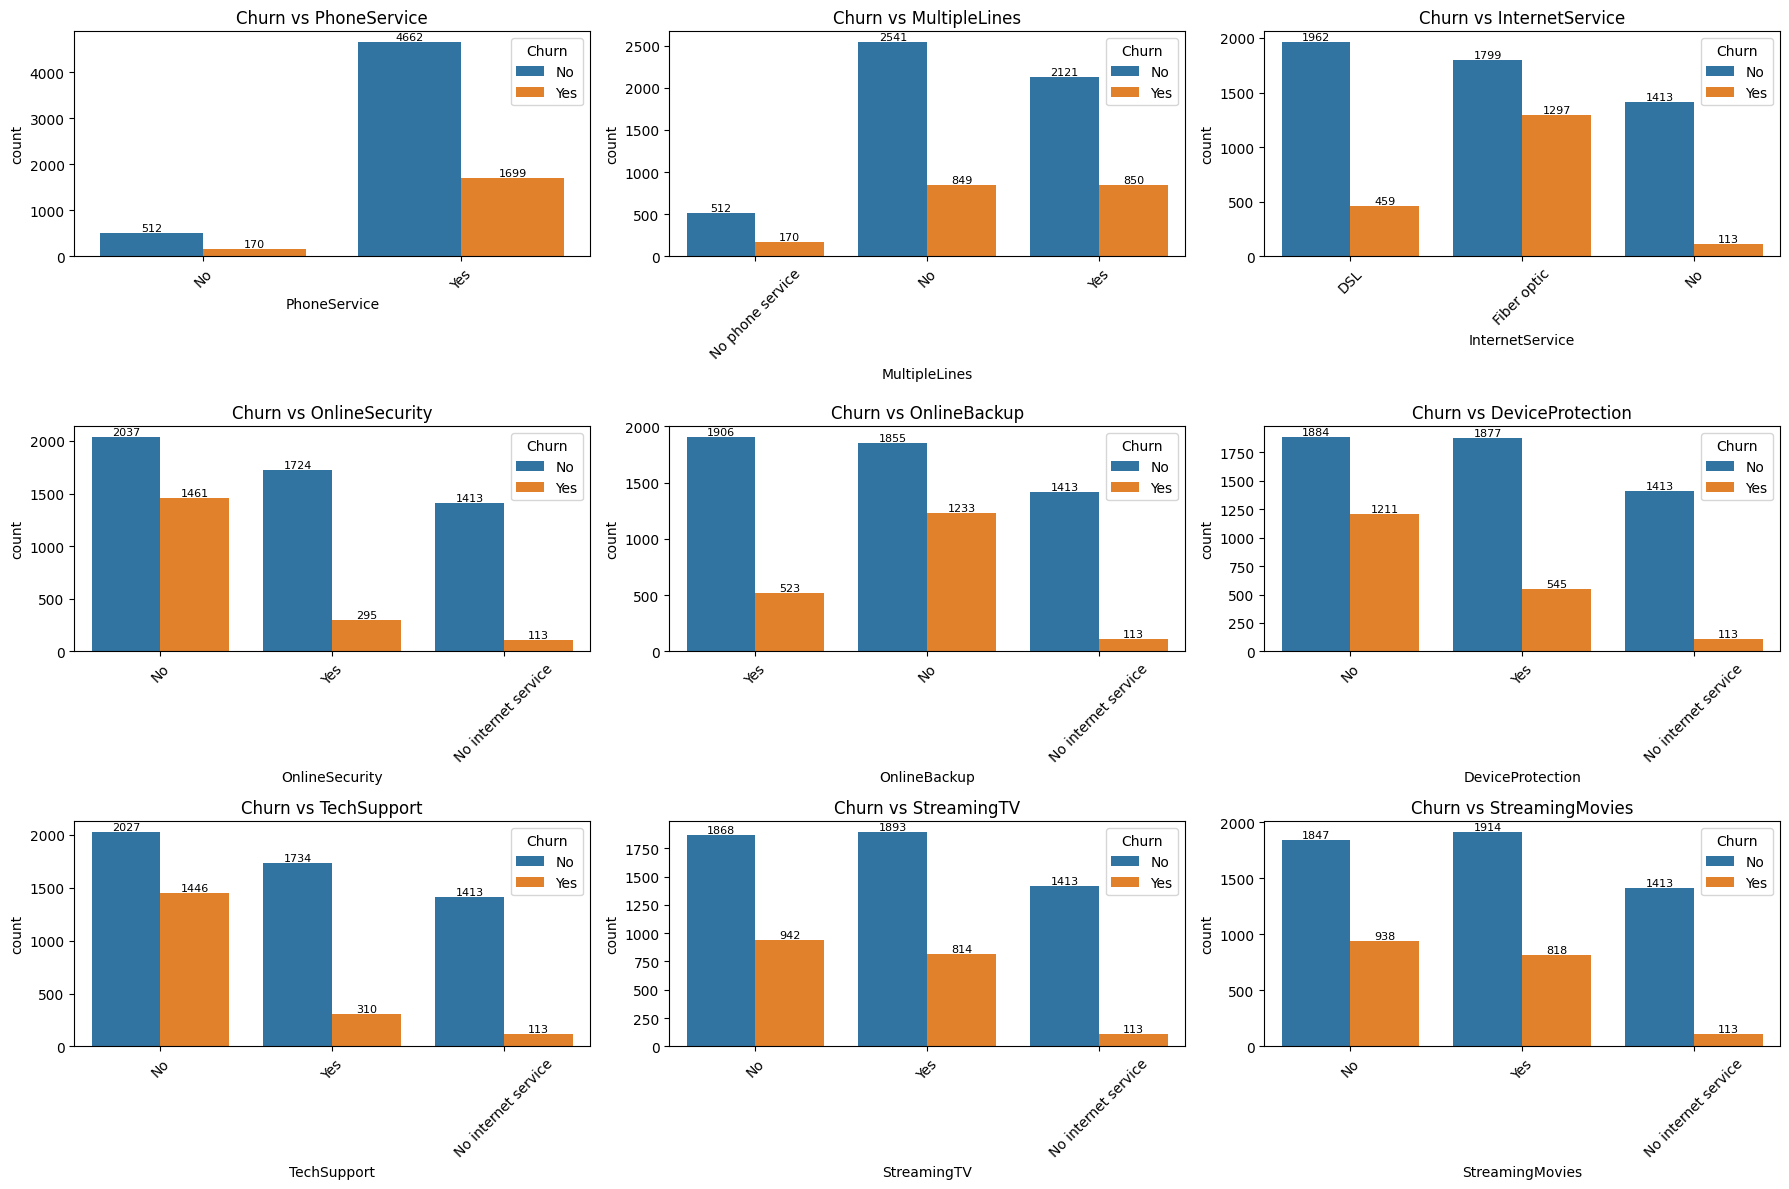

In [18]:
# List of categorical service columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # flatten to make looping easier

# Create countplots with hue='Churn'
for i, col in enumerate(cols):
    ax = sns.countplot(x=col, data=df, hue="Churn", ax=axes[i])
    ax.set_title(f'Churn vs {col}')
    ax.tick_params(axis='x', rotation=45)
    
    # Add count labels for both hue categories
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)

# Remove extra axes if any
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


-----------Features that clearly reduce churn:

OnlineSecurity

OnlineBackup

TechSupport

DeviceProtection

---------Features that correlate with higher churn:

Fiber Optic Internet

StreamingTV / Movies

MultipleLines

Text(0.5, 1.0, 'Gender-wise Churn Count')

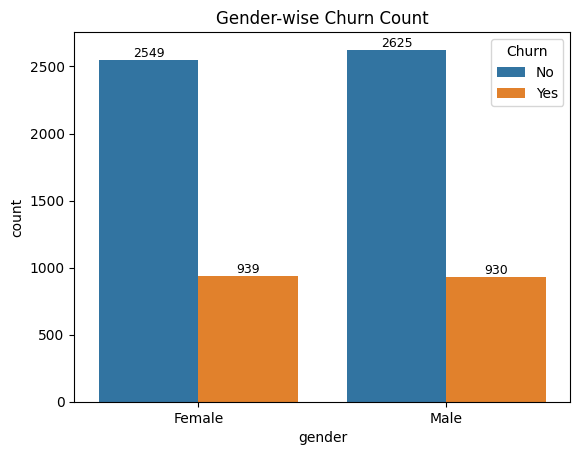

In [5]:
# Countplot with hue
bx = sns.countplot(x='gender', data=df, hue='Churn')  

# Add labels to all hue bars
for container in bx.containers:
    bx.bar_label(container, fontsize=9, color='Black')

# Add title and improve style
plt.title("Gender-wise Churn Count", fontsize=12)

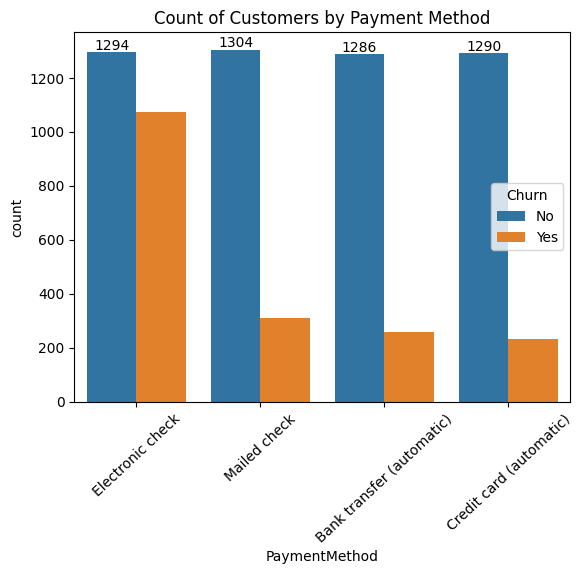

In [26]:
plt.Figure(figsize=(4,10))
ax = sns.countplot( x = "PaymentMethod", data = df,
                    hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Payment Method")
plt.xticks(rotation = 43)
plt.show() 

Customers using Electronic Check have the highest churn, while those using automatic payment methods (Bank transfer, Credit Card) show significantly lower churn rates.